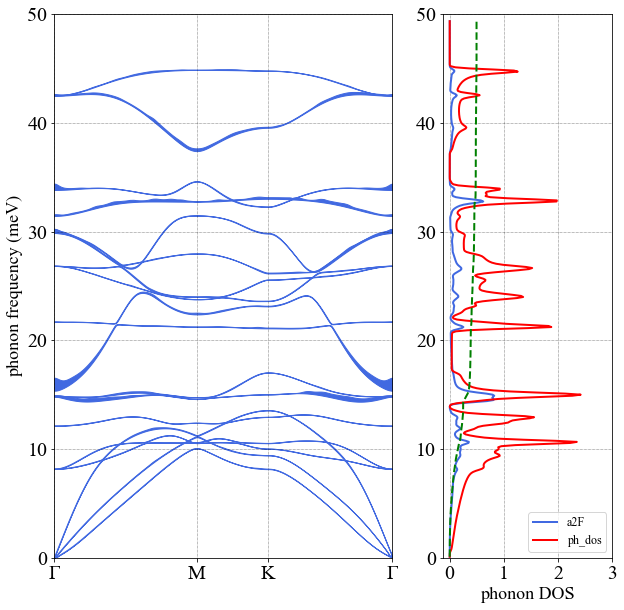

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors



x = np.arange(0, 238, 1)
freq = np.zeros((18,238))
lwidth = np.zeros((18,238))

a2F = np.zeros((500))
ph_dos = np.zeros((500))
x1 = np.zeros((500))
el_phon = np.zeros((500))

with open('lwidth.dat') as fp:
    for line in fp:
        item = line.split()  
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines
        freq[int(item[1])-1][int(item[0])-1] = float(item[2])
        lwidth[int(item[1])-1][int(item[0])-1] = float(item[3])


with open('a2F.dat') as fp:
    for i, line in enumerate(fp):
        item = line.split()
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines
        x1[i]= float(item[0])
        a2F[i] = float(item[4])
        
with open('ph_dos.dat') as fp:
    for i, line in enumerate(fp):
        item = line.split()
        if(line=='\n' or line.strip()=='' or str.startswith(item[0],'#')):
            continue #skip comments and blank lines
        ph_dos[i] = float(item[4])       

for i in range(500):
    for j in range(i):
        el_phon[i]+= a2F[j]*(2/x1[j])*0.0987171
           
# a = 0.0
# for i  in range(500):
#     a += a2F[i]*(2/x1[i])*0.0987171

# print(a)    

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
        
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]}, figsize=(10,10))


        
for i in range(18):
    ax1.plot(x,freq[i], color='royalblue', linewidth=0.5)
    ax1.fill_between(x, freq[i], freq[i]+lwidth[i]/2,color='royalblue' )

#ax1.set_aspect(3) 
# ax1.set_title('spin down', fontsize=18)
ax1.grid(color='black', linestyle='dotted', linewidth=0.5)
ax1.set_xticks([0, 100, 150, 237])
ax1.set_xticklabels(['Г', 'M', 'K', 'Г'])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax1.set_xlim([0, 237])
ax1.set_ylim([0, 50])
ax1.set_ylabel('phonon frequency (meV)', fontsize=18)  


ax2.plot(a2F, x1, color='royalblue', linewidth=2, label='a2F')
ax2.plot(ph_dos, x1, color='red', linewidth=2, label='ph_dos')
ax2.plot(el_phon, x1, color='green', linewidth=2, linestyle='dashed',)
# ax2.set_xlim([0, 0.5])
ax2.set_ylim([0, 50])
ax2.grid(color='black', linestyle='dotted', linewidth=0.5)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax2.set_xticks([0, 1, 2 ,3])
ax2.set_xlabel('phonon DOS', fontsize=18)
ax2.legend(loc='lower right', fontsize=12)



fig.savefig('dn.png', dpi=300)
